In [2]:
#import libraries
import pandas as pd
import os


Task # 1: Merge the 12 months of sales data into a single CSV file

In [3]:
data= pd.read_csv('./Sales_April_2019.csv')
#Read all files from directory


In [4]:
#Load Datasets into pandas dataframes
data1 = pd.read_csv('./Sales_April_2019.csv')
data2= pd.read_csv('./Sales_August_2019.csv')
data3= pd.read_csv('./Sales_December_2019.csv')
data4 = pd.read_csv('./Sales_February_2019.csv')
data5= pd.read_csv('./Sales_January_2019.csv')
data6= pd.read_csv('./Sales_July_2019.csv')
data7= pd.read_csv('./Sales_June_2019.csv')
data8= pd.read_csv('./Sales_March_2019.csv')
data9=pd.read_csv('./Sales_May_2019.csv')
data10=pd.read_csv('./Sales_November_2019.csv')
data11=pd.read_csv('./Sales_October_2019.csv')
data12=pd.read_csv('./Sales_September_2019.csv')
#Concatenate the data-frames vertically using the concat() function
merged_data =  pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12])
#Save the merged data to a new file
merged_data.to_csv('merged_sales_data.csv', sep=',', index=False)
merged_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean Data

In [5]:
merged_data.head()
#Drop rows with NAN
merged_data = merged_data.dropna()

Check and Remove Duplicates

In [19]:
#Check duplicates
merged_data.duplicated()
# Remove the duplicats
merged_data.drop_duplicates()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


Display and Convert Data Types

In [6]:
#

# Step 1: remove any rows with non-numeric values
merged_data = merged_data[pd.to_numeric(merged_data['Quantity Ordered'], errors='coerce').notnull()]
merged_data = merged_data[pd.to_numeric(merged_data['Price Each'], errors='coerce').notnull()]

# Step 2: convert columns to numeric values
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])
merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])


Check and Fill missing values

In [17]:
# check for missing values
print(merged_data.isnull().sum())
#Handle missing values
merged_data.fillna(method='ffill', inplace=True)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64


Display and convert Data types

In [29]:
#merged_data.dtypes
# Its Another option
#convert data types
# Replace non-numeric values with NaN
#merged_data['Quantity Ordered']=pd.to_numeric(merged_data['Quantity Ordered'])
#merged_data['Price Each']=pd.to_numeric(merged_data['Price Each'])




Check and Remove outliers

In [26]:
#Check for outliers
merged_data.describe()
#Remove outliers
#Q1 = merged_data.quantile(0.25)
#Q3 = merged_data.quantile(0.75)
#IQR = Q3 - Q1
#merged_data = merged_data[~((merged_data < (Q1 - 1.5 * IQR)) |(merged_data > (Q3 + 1.5 * IQR))).any(axis=1)]

,Quantity Ordered,Price Each,Sales,Hour,Minute
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917,14.413305,29.481361
std,0.442793,332.731330,332.919771,5.423416,17.317573
min,1.000000,2.990000,2.990000,0.000000,0.000000
25%,1.000000,11.950000,11.950000,11.000000,14.000000
50%,1.000000,14.950000,14.950000,15.000000,29.000000
75%,1.000000,150.000000,150.000000,19.000000,45.000000
max,9.000000,1700.000000,3400.000000,23.000000,59.000000


Augment Data with additional columns


In [7]:
#Add Month Column
merged_data['Month']=merged_data['Order Date'].str[0:2]

merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [27]:
merged_data.to_csv('merged_sales_data.csv', sep=',', index=False)

Question1: What was the best month for sales? How much was earned that month

In [8]:
#Add a sales column
# sales = Quantity ordered*Price for each
merged_data['Sales']= merged_data['Quantity Ordered'] * merged_data['Price Each']
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [9]:
# sort the data using the groupby() function
merged_data.groupby('Month').sum('Sales')

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


Therefore December was the best month in terms of sales with a total of 4613443.34 while the worst was Jnauary

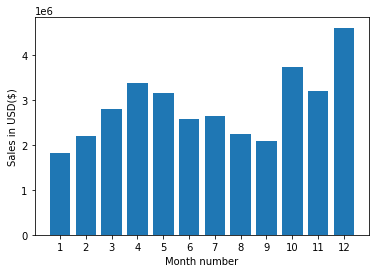

In [10]:
# plot graph to visualize the data
import matplotlib.pyplot as plt
results = merged_data.groupby('Month').sum()
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()


Question 2: What city had the highest number of sales
First step is to augment the data by adding a city column
City is right in between the address column and has to be extracted

In [11]:
# we use .apply() method
# It allows you to run any function in the dataframe
#merged_data['Column']= merged_data['Purchase Address'].apply(lambda x: x.split(',')[1])
def get_city(address):
    elements = address.split(',')
    if len(elements) >= 2:
        return elements[1]
    else:
        return ''

merged_data['City'] = merged_data['Purchase Address'].apply(get_city)
#merged_data=merged_data.drop(columns='Column')

merged_data.head()
#This code defines a function get_city that splits the address by comma and
#returns the second element if the list has at least two elements. If the list has fewer 
#than two elements, it returns an empty string.
#The apply method then applies this function to each element of the 'Purchase Address'
# column and assigns the result to the 'Column' column









,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [12]:
merged_data.groupby('City').sum('Sales')

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


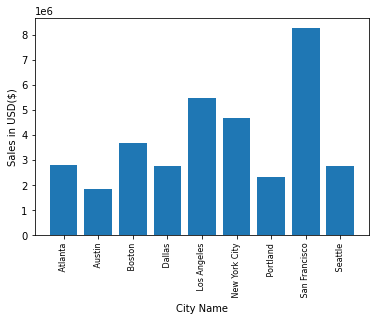

In [13]:
# plot graph to visualize the data
import matplotlib.pyplot as plt
cities = [city for city, df in merged_data.groupby('City')]
results = merged_data.groupby('City').sum()

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()

Therefore San Fransisco had the highest number of sales

Question3: What time should we display advertisements to maximise likelihood of customers buying product?

In [14]:
merged_data['Order Date']=pd.to_datetime(merged_data['Order Date'])
merged_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [15]:
# Create an hour column with the hour number
merged_data['Hour']= merged_data['Order Date'].dt.hour
merged_data['Minute']= merged_data['Order Date'].dt.minute

merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,9,27


In [16]:
merged_data.groupby('Hour').sum('Sales')

,Quantity Ordered,Price Each,Sales,Minute
Hour,,,,
0,4428,709296.70,713721.27,103596
1,2619,458490.00,460866.88,61807
2,1398,233833.64,234851.44,32508
3,928,144726.42,145757.89,23044
4,937,162058.18,162661.01,26876
5,1493,229621.21,230679.82,42877
6,2810,445000.11,448113.00,80343
7,4556,740568.11,744854.12,127447
8,7002,1185970.62,1192348.97,198135


In [17]:
merged_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


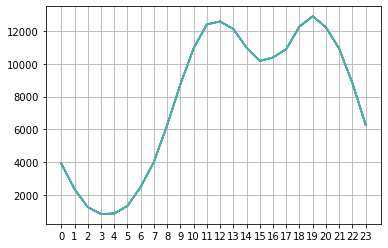

In [18]:
# plot graph to visualize the data
import matplotlib.pyplot as plt

hours, count = zip(*merged_data.groupby(['Hour']).count().iterrows())
plt.xticks(hours)
plt.grid()
plt.plot(hours, count)
plt.show()
#This code creates two lists, "hours" and "count", by iterating over the rows of the 
#grouped count data and extracting the hour and count values. It then plots the
#count values against the hour values.




18 and 19 hours are therefore the best time to maximise advertisements

Question 4: What products are most often sold together

In [19]:
# To show all data that has duplicates filtered by Order ID and therefore Products that had the same order ID
merged_data.head()
df =merged_data[merged_data['Order ID'].duplicated(keep=False)]
df.head(20)
#create new dataframe  to group
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)

C:\Users\chris\AppData\Local\Temp\ipykernel_11800\1992263887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [20]:
#count the pairs to gain the final count of products sold together
#import new libraries first to perform the tasks
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
#Display the results
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

The most products sold together were iphone, lightning charging cable which were 1005

Question 5: What product sold the most and why do you think it sold the most

In [21]:
merged_data.head()
# Sum the quantity ordered based on groupby() the product
product_group= merged_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute
Product,,,,,
20in Monitor,4129,451068.99,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789


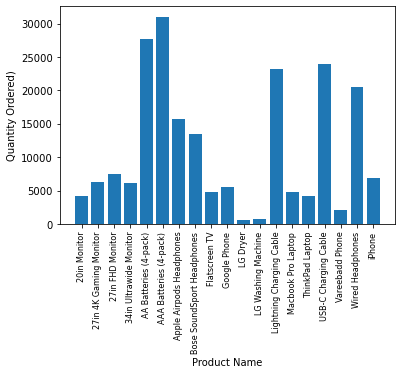

In [22]:
# plot graph to visualize the data
quantity_ordered = product_group.sum()['Quantity Ordered']
import matplotlib.pyplot as plt
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered)')
plt.xlabel('Product Name')
plt.show()




AAA Batteries sold the most

In [23]:
# Display the prices for each product 
#To show the hypothesis on the reason why a given product sells more
prices = merged_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\chris\AppData\Local\Temp\ipykernel_11800\4244422158.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


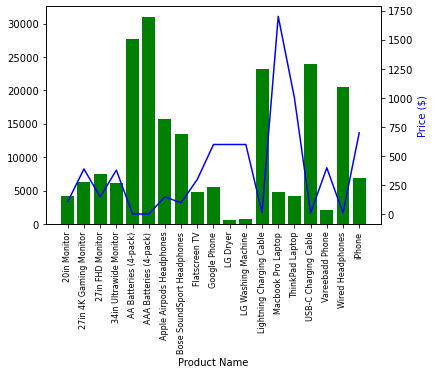

In [24]:
# Plot a graph to show the corelation between prices and the products
prices= merged_data.groupby('Product').mean()['Price Each']
fig, ax1= plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax2.set_ylabel('Quantity Ordered', color='g')
ax1.set_xticklabels(products, rotation='vertical', size=8)

ax2.set_ylabel('Price ($)', color ='b' )
plt.show()

If the quantity ordered is high the product is low therefore prooving the hypothesis